## House Prices: Advanced Regression Techniques - Kaggle
* https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

해당 경진대회는 아래 논문의 데이터셋으로 만들어졌습니다.
http://jse.amstat.org/v19n3/decock.pdf

또한, 사이킷런 공식문서에 있는 보스턴 주택가격 데이터셋도 같은 데이터셋을 기반으로 만들어져 있습니다.

## 라이브러리 로드

In [12]:
# pandas, seaborn, numpy 를 불러옵니다.

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# seaborn style 설정

sns.set(font="Malgun Gothic", rc={'axes.unicode_minus':False})

In [10]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Text(0.5, 1.0, '한글제목')

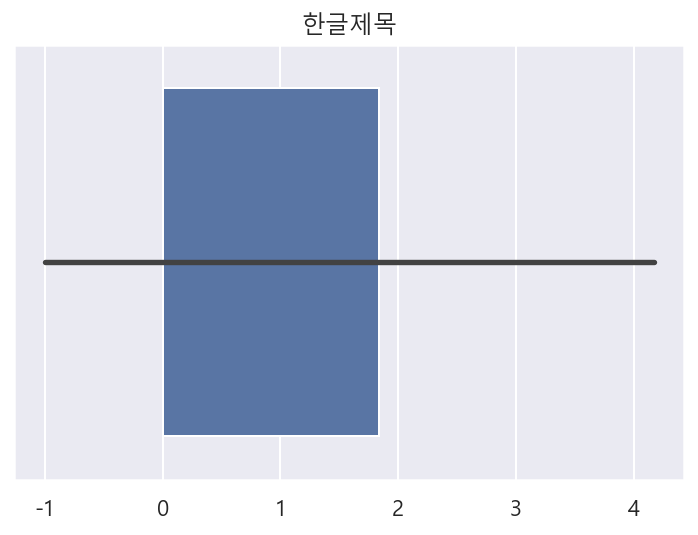

In [13]:
sns.barplot(x = [1,2,3,-5,4,6])
plt.title("한글제목")

## 데이터셋 가져오기

In [14]:
# train 데이터를 불러옵니다.

train = pd.read_csv("data/train.csv")
train.shape

(1460, 81)

In [17]:
# 컬럼이 모두 보이도록 설정합니다.

pd.options.display.max_columns=100

In [18]:
# 미리보기를 합니다.

train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [19]:
# test 데이터셋을 불러오고 갯수를 출력해 봅니다.

test = pd.read_csv("data/test.csv")
test.shape

(1459, 80)

In [20]:
# test 데이터셋을 미리보기 합니다.

test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [30]:
# set을 활용해서 컬럼을 비교합니다.

set(train.columns.tolist()) = set(test.columns.tolist())

SyntaxError: can't assign to function call (<ipython-input-30-918c48598478>, line 3)

## EDA

### histogram

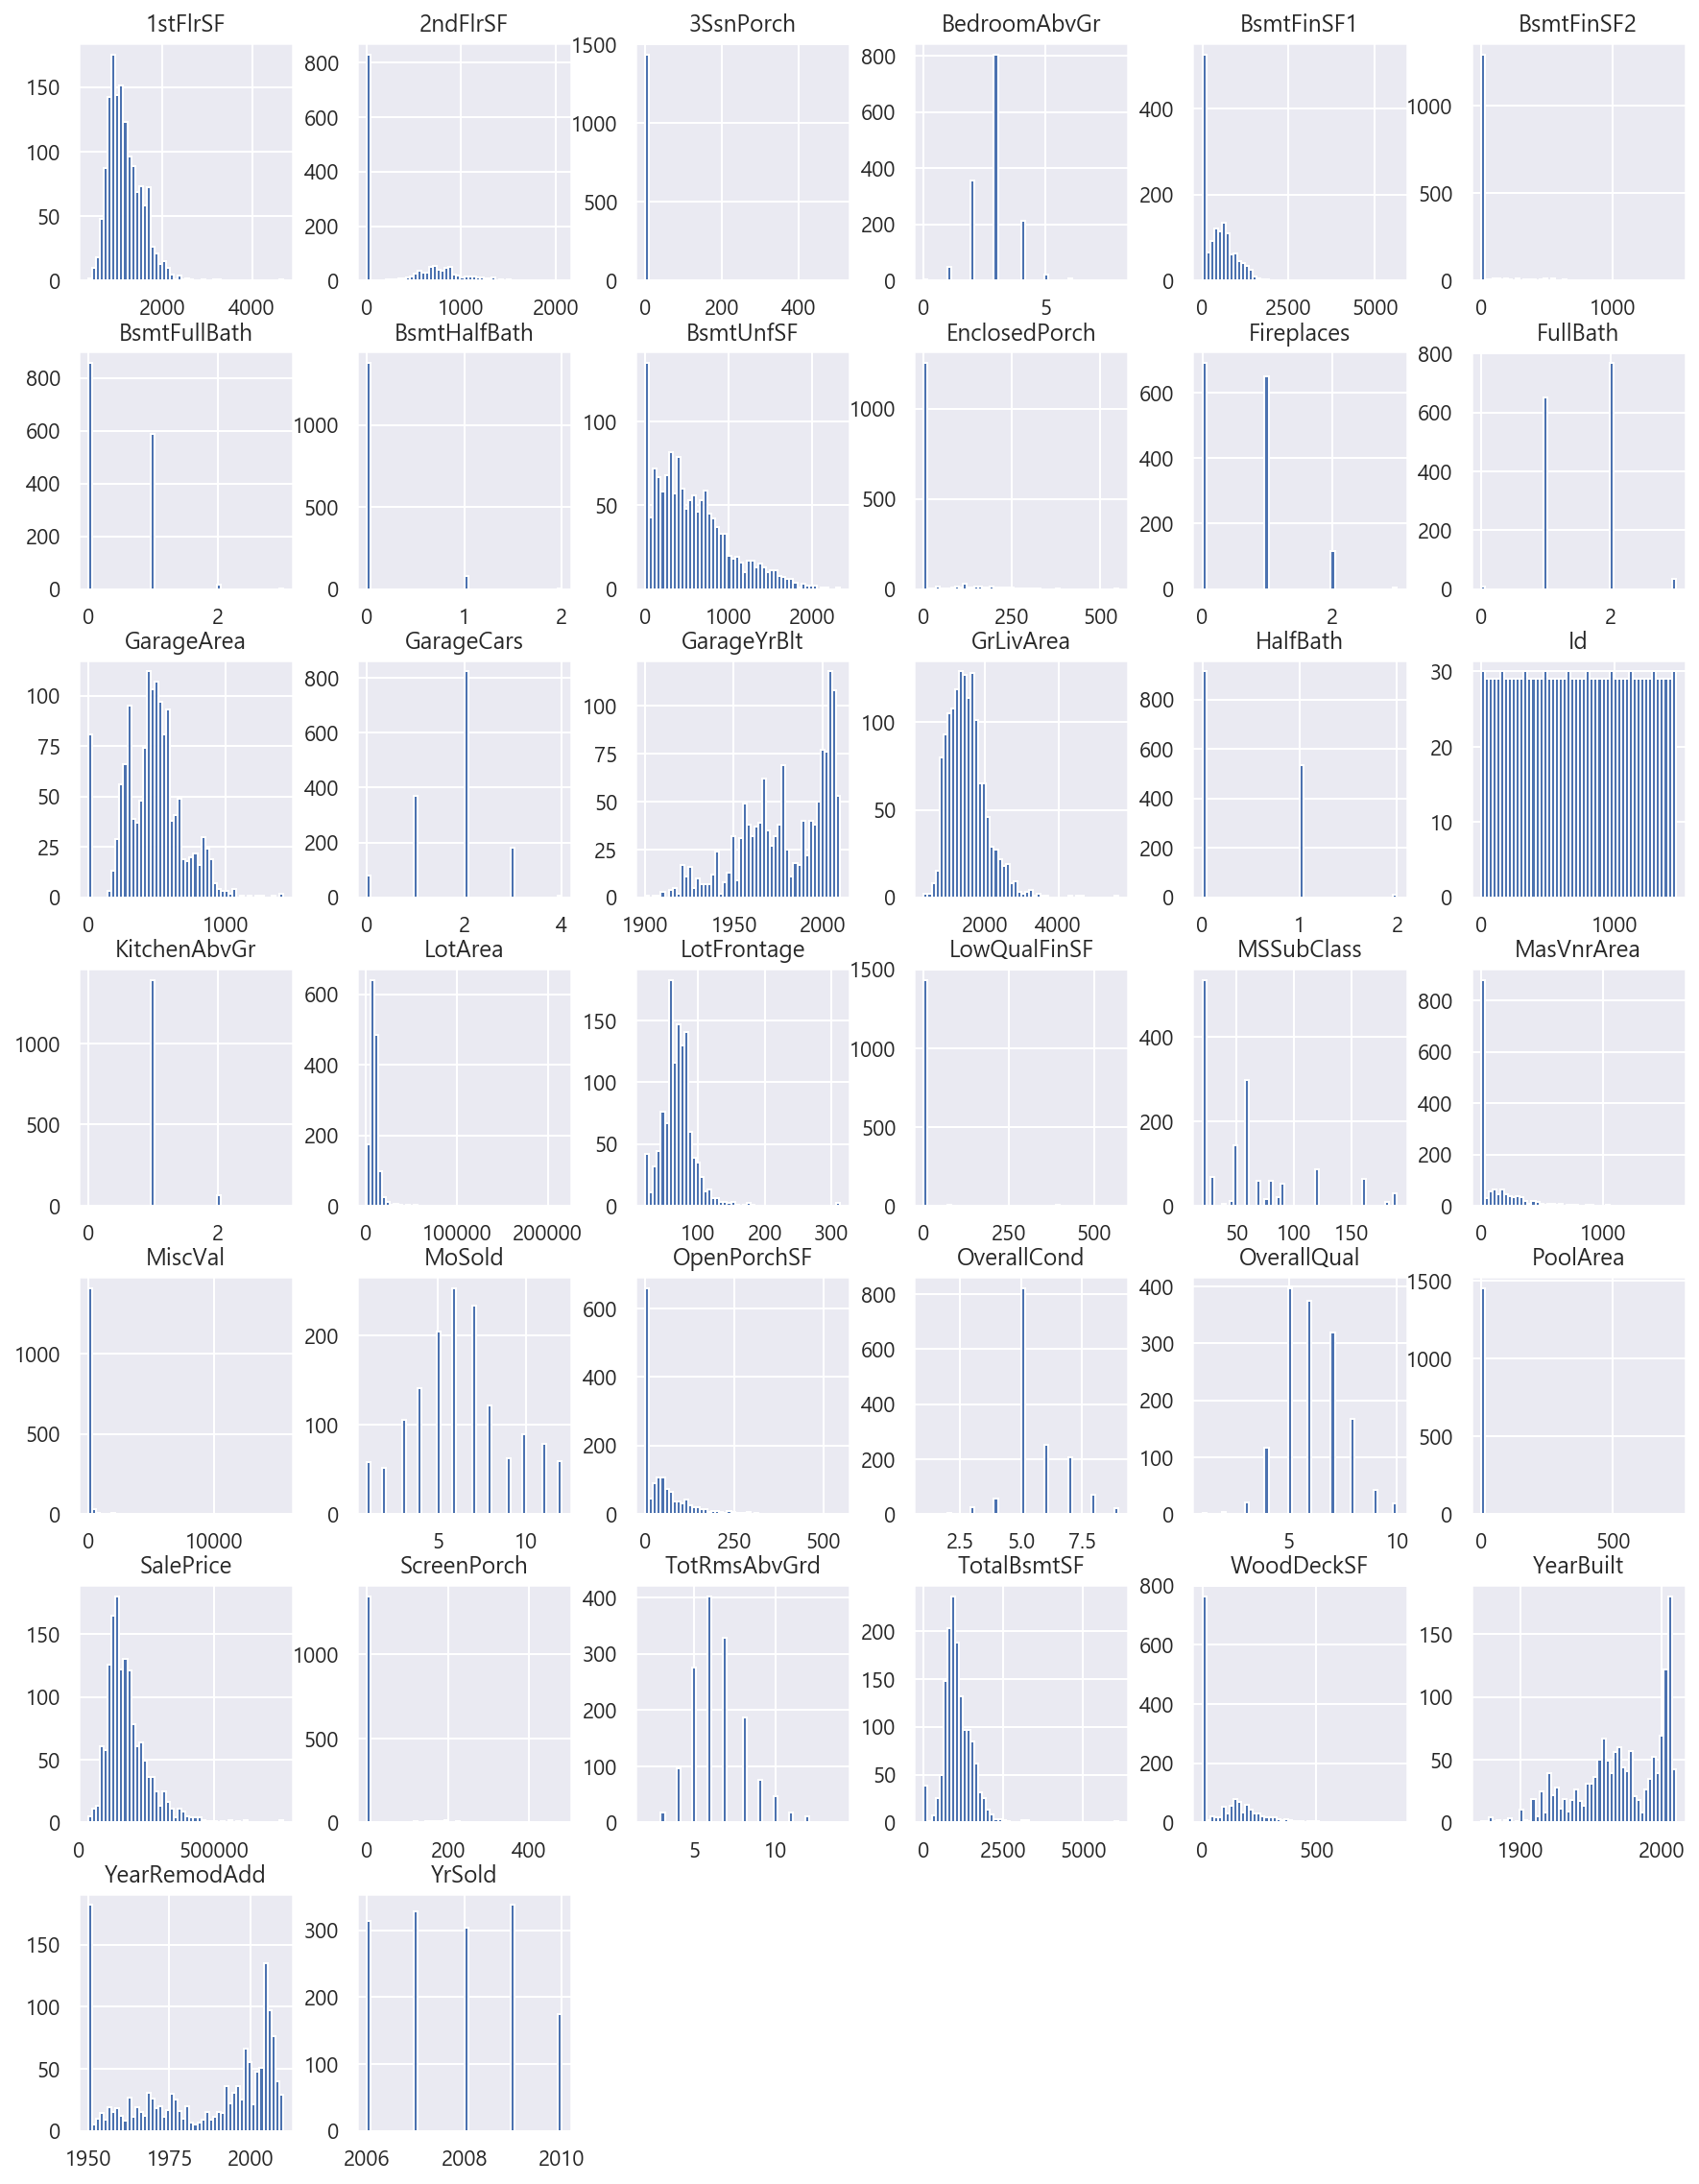

In [31]:
# 전체 변수에 대한 histogram을 그립니다. bins 옵션으로 막대의 수를 조정합니다.

h = train.hist(figsize=(15,20), bins=50) # 막ㄷ가 몇개 없는 데이터들은 범주형 데이터인다

### 정답값 label 따로보기

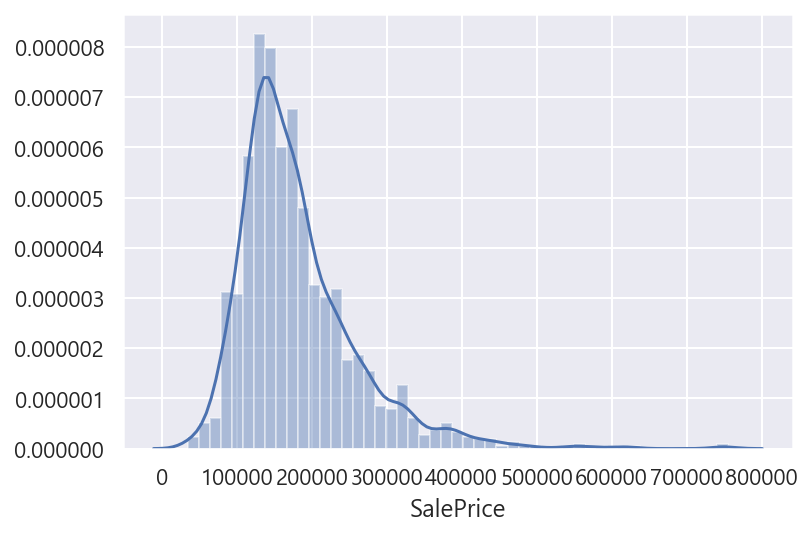

In [32]:
# SalePrice 의 distplot을 봅니다.

sns.distplot(train['SalePrice'])

In [34]:
# SalePrice 의 왜도와 첨도를 구합니다.
print("왜도(Skewness):", train['SalePrice'].skew())
print("첨도(Kurtosis):", train['SalePrice'].kurtosis())

왜도(Skewness): 1.8828757597682129
첨도(Kurtosis): 6.536281860064529


In [35]:
train['SalePrice_log'] = np.log(train['SalePrice'] + 1) # +1하는이유 뭐엿지? 찾아보기 만약에 값이 0에 가까운값이 이으면 -무한대로 수렴하는걸 방지하기위해서 해준다

In [36]:
# SalePrice를 정규분포로 변환하고 왜도와 첨도를 구합니다.

print("왜도(Skewness):", train['SalePrice_log'].skew())
print("첨도(Kurtosis):", train['SalePrice_log'].kurtosis())

왜도(Skewness): 0.12134661989685333
첨도(Kurtosis): 0.809519155707878


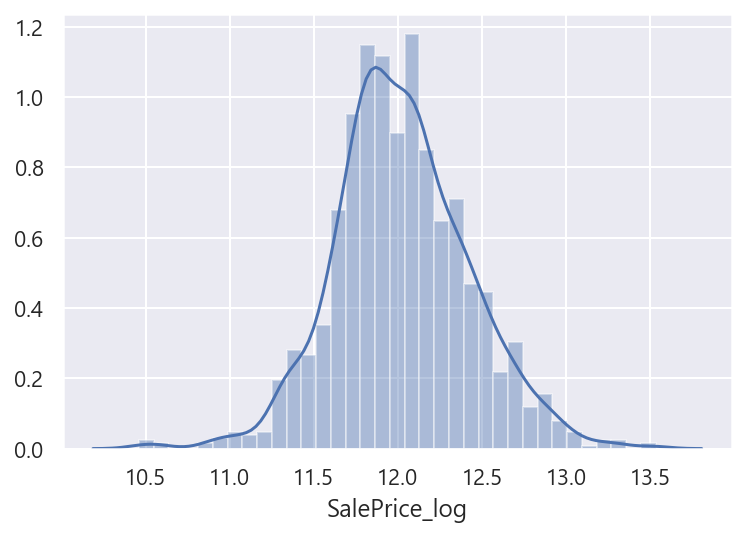

In [37]:
# SalePrice 를 정규분포 형태로 그립니다.

sns.distplot(train['SalePrice_log'])

In [43]:
train["SalePrice_exp"]= np.exp(train['SalePrice_log']) - 1

train[['SalePrice', 'SalePrice_log', 'SalePrice_exp']].head()

SalePrice  SalePrice_log  SalePrice_exp
0     208500      12.247699       208500.0
1     181500      12.109016       181500.0
2     223500      12.317171       223500.0
3     140000      11.849405       140000.0
4     250000      12.429220       250000.0

### 결측치 보기
* [Missing data - Wikipedia](https://en.wikipedia.org/wiki/Missing_data)

In [45]:
# 결측치가 얼마나 되는지 봅니다.

train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

### 집값과 상관계수가 높은 데이터 보기

In [48]:
# 상관계수를 구하기 전에 수치형 데이터만 불러옵니다.

train.dtypes[train.dtypes != "object"]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
SalePrice_log    float64
SalePrice_exp    float64


In [51]:
# 상관계수의 값 차이를 style.background_gradient() 로 색상으로 구분해서 봅니다.

corr = train.corr()
corr.style.background_gradient()

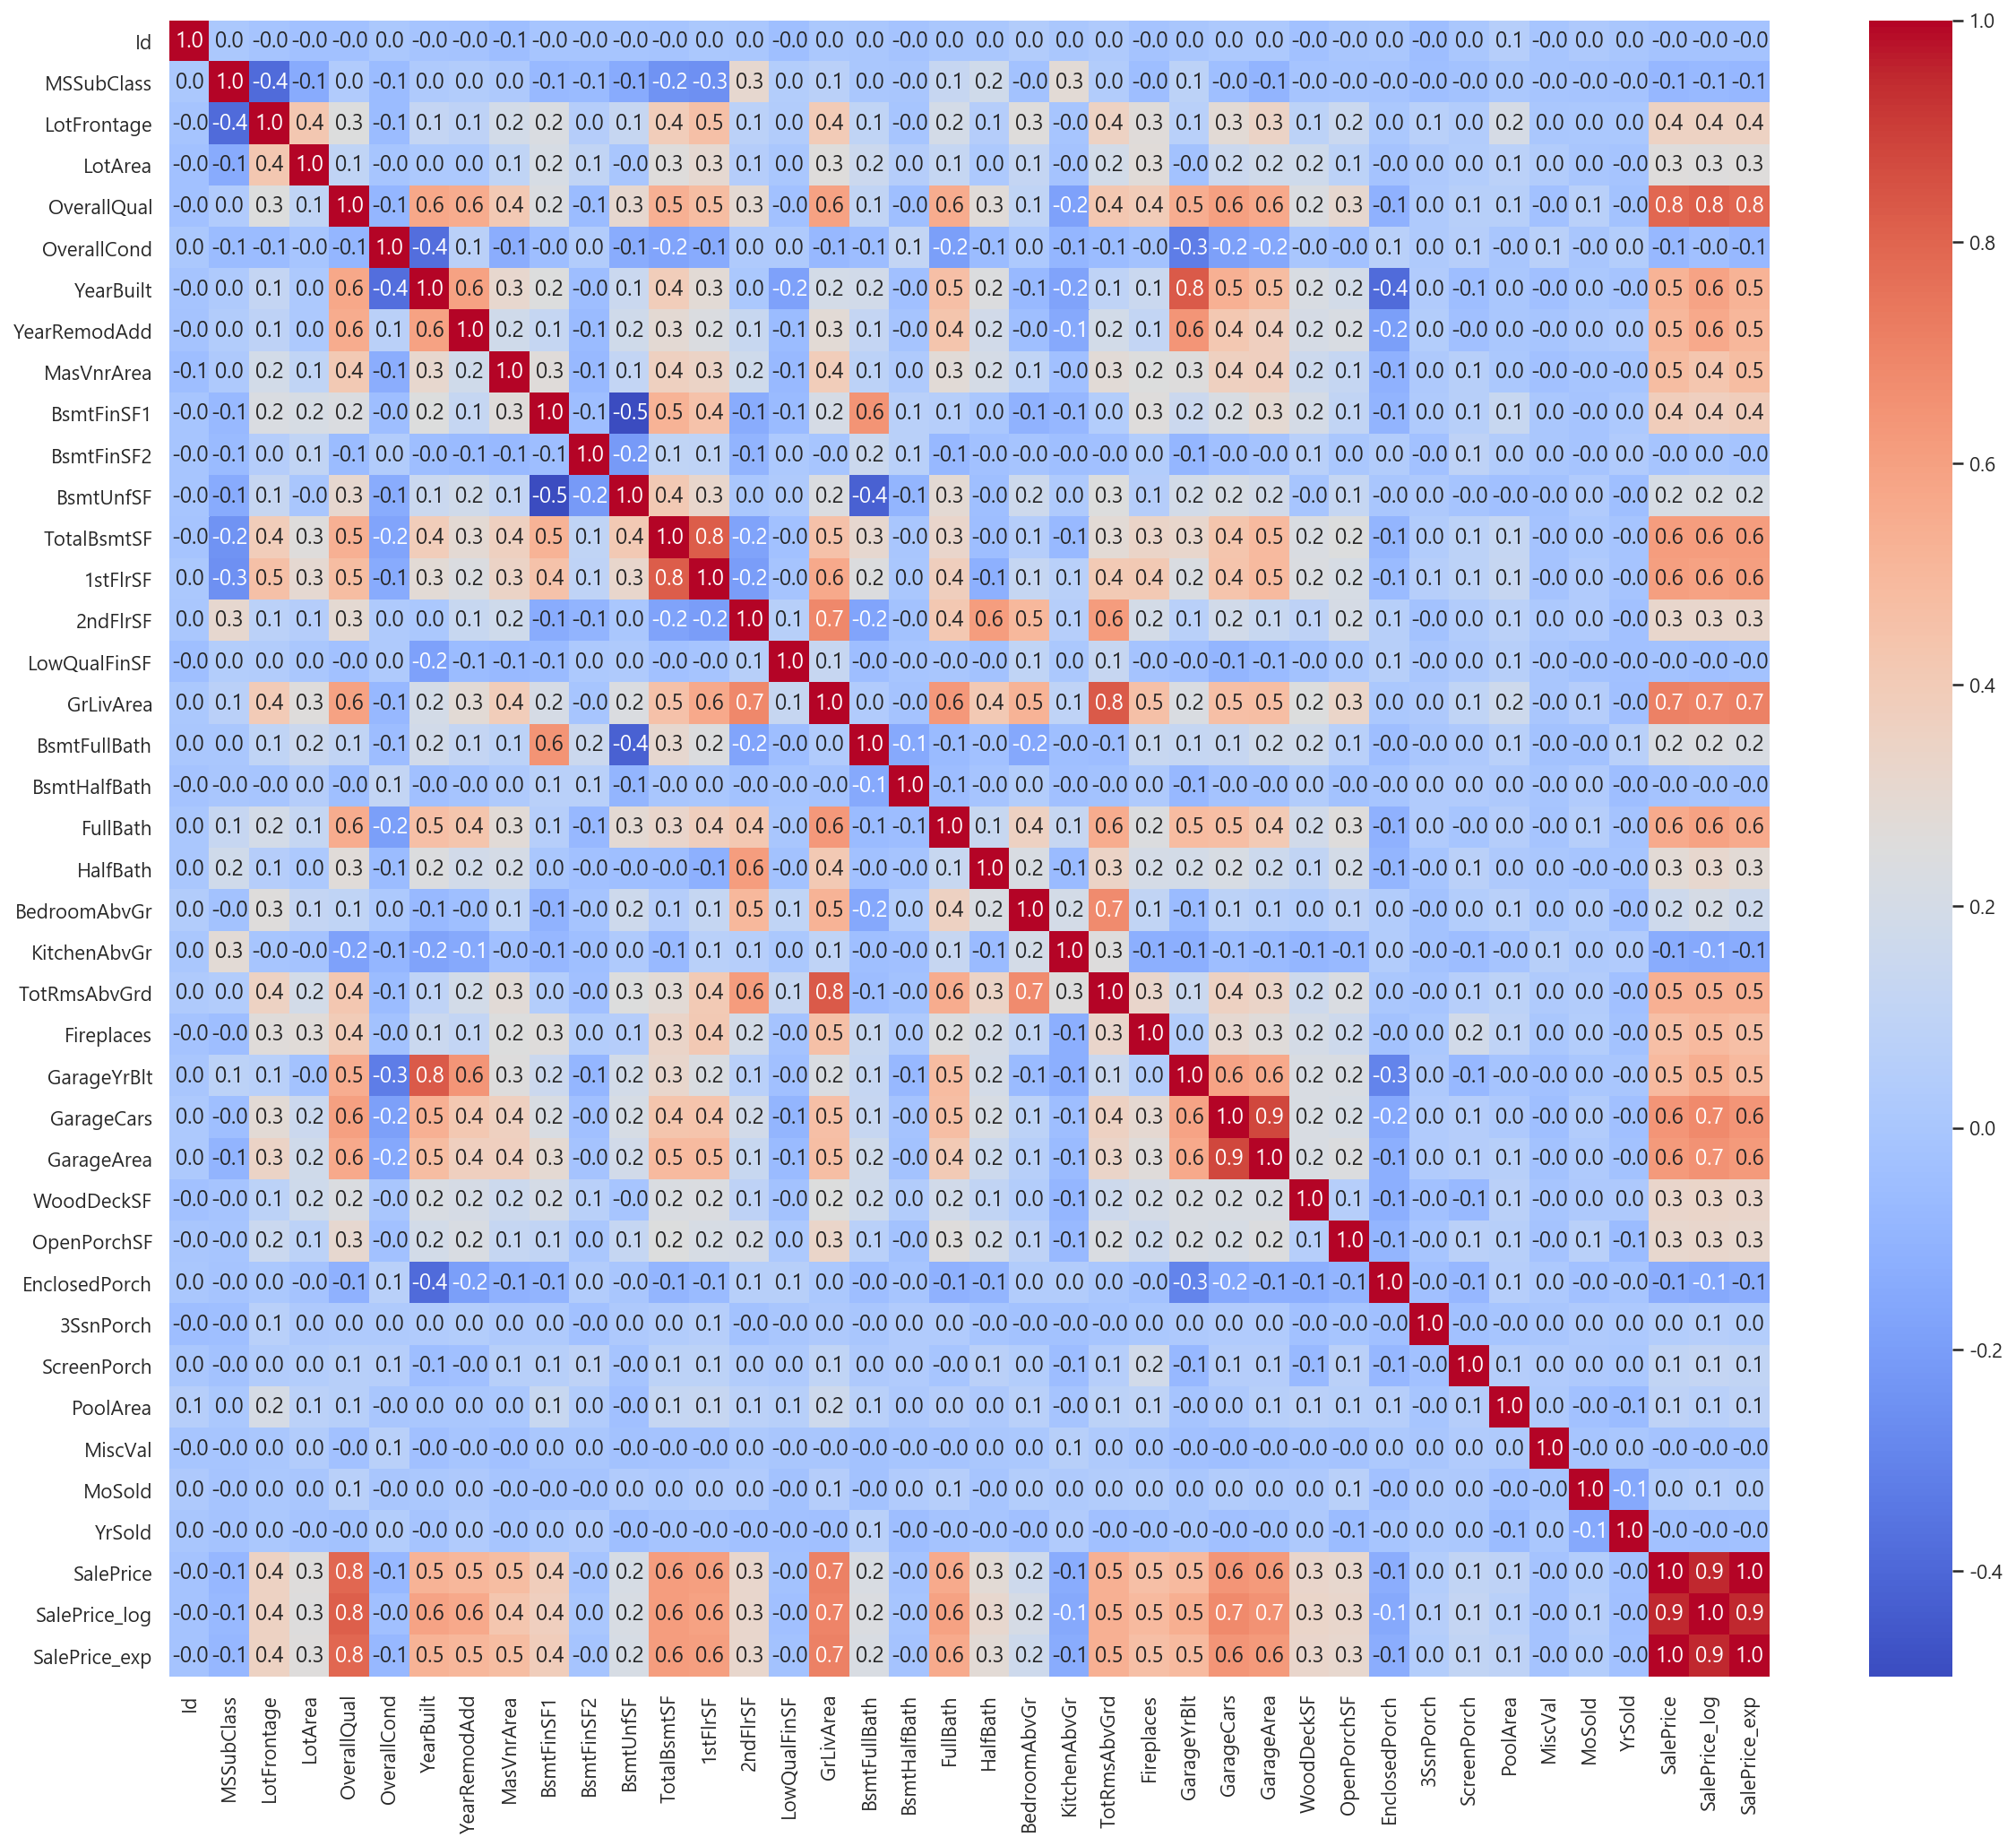

In [58]:
plt.figure(figsize=(20,17))
sns.heatmap(data = corr, annot=True, fmt='.1f', cmap='coolwarm')

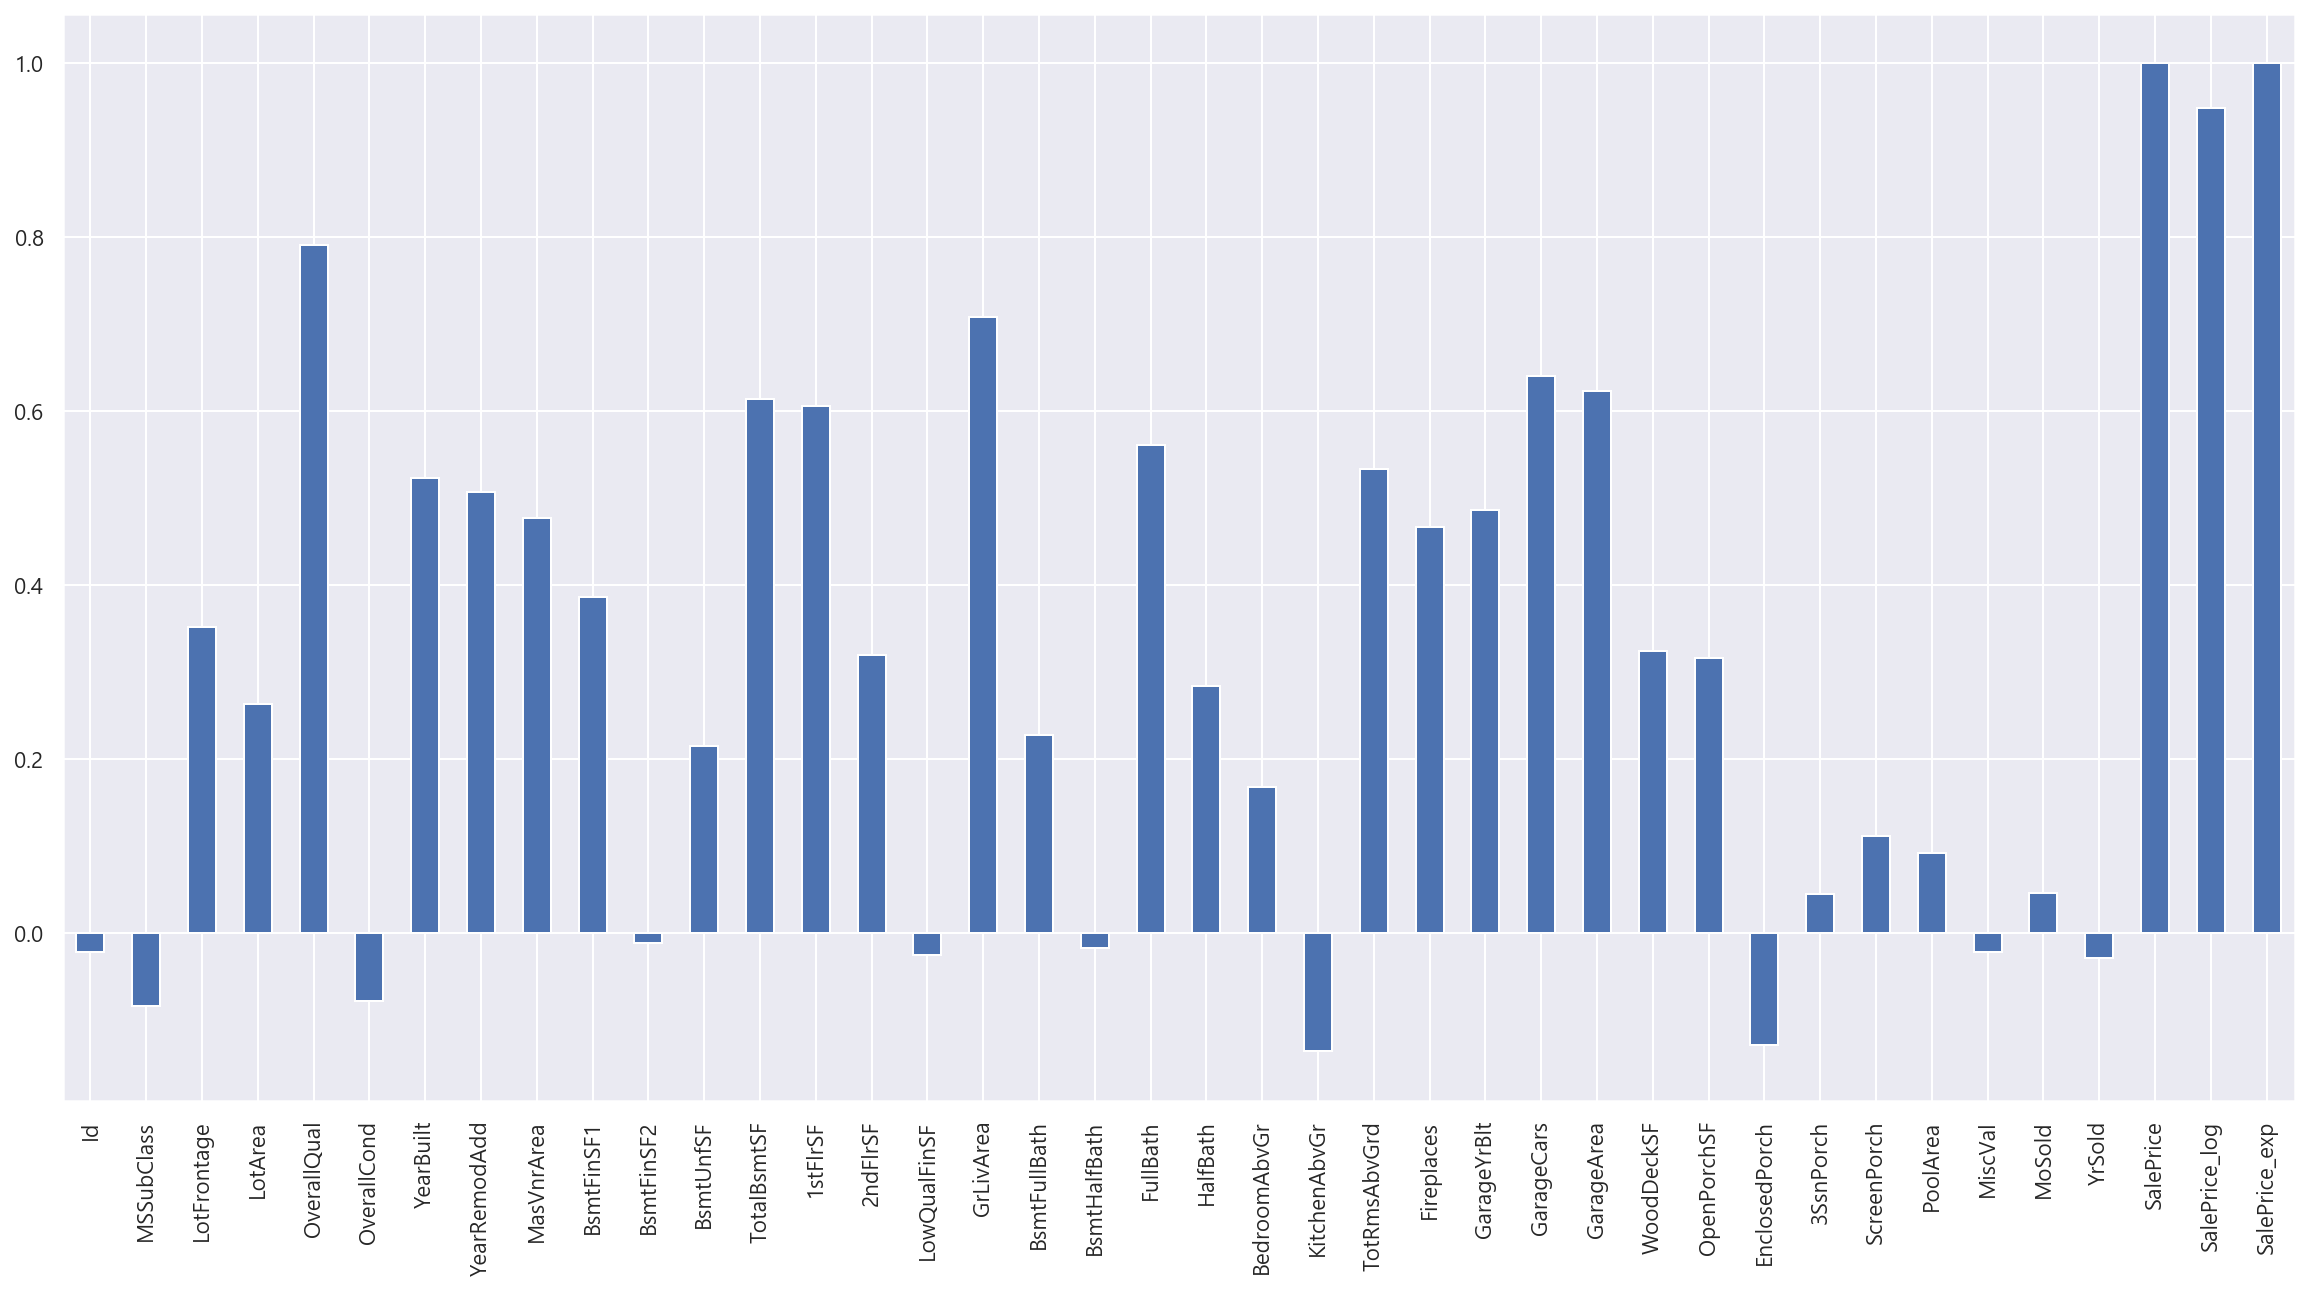

In [62]:
# SalePrice와 상관계수가 특정 수치 이상인 데이터만 봅니다.

corr["SalePrice"].plot.bar(figsize=(20,10))

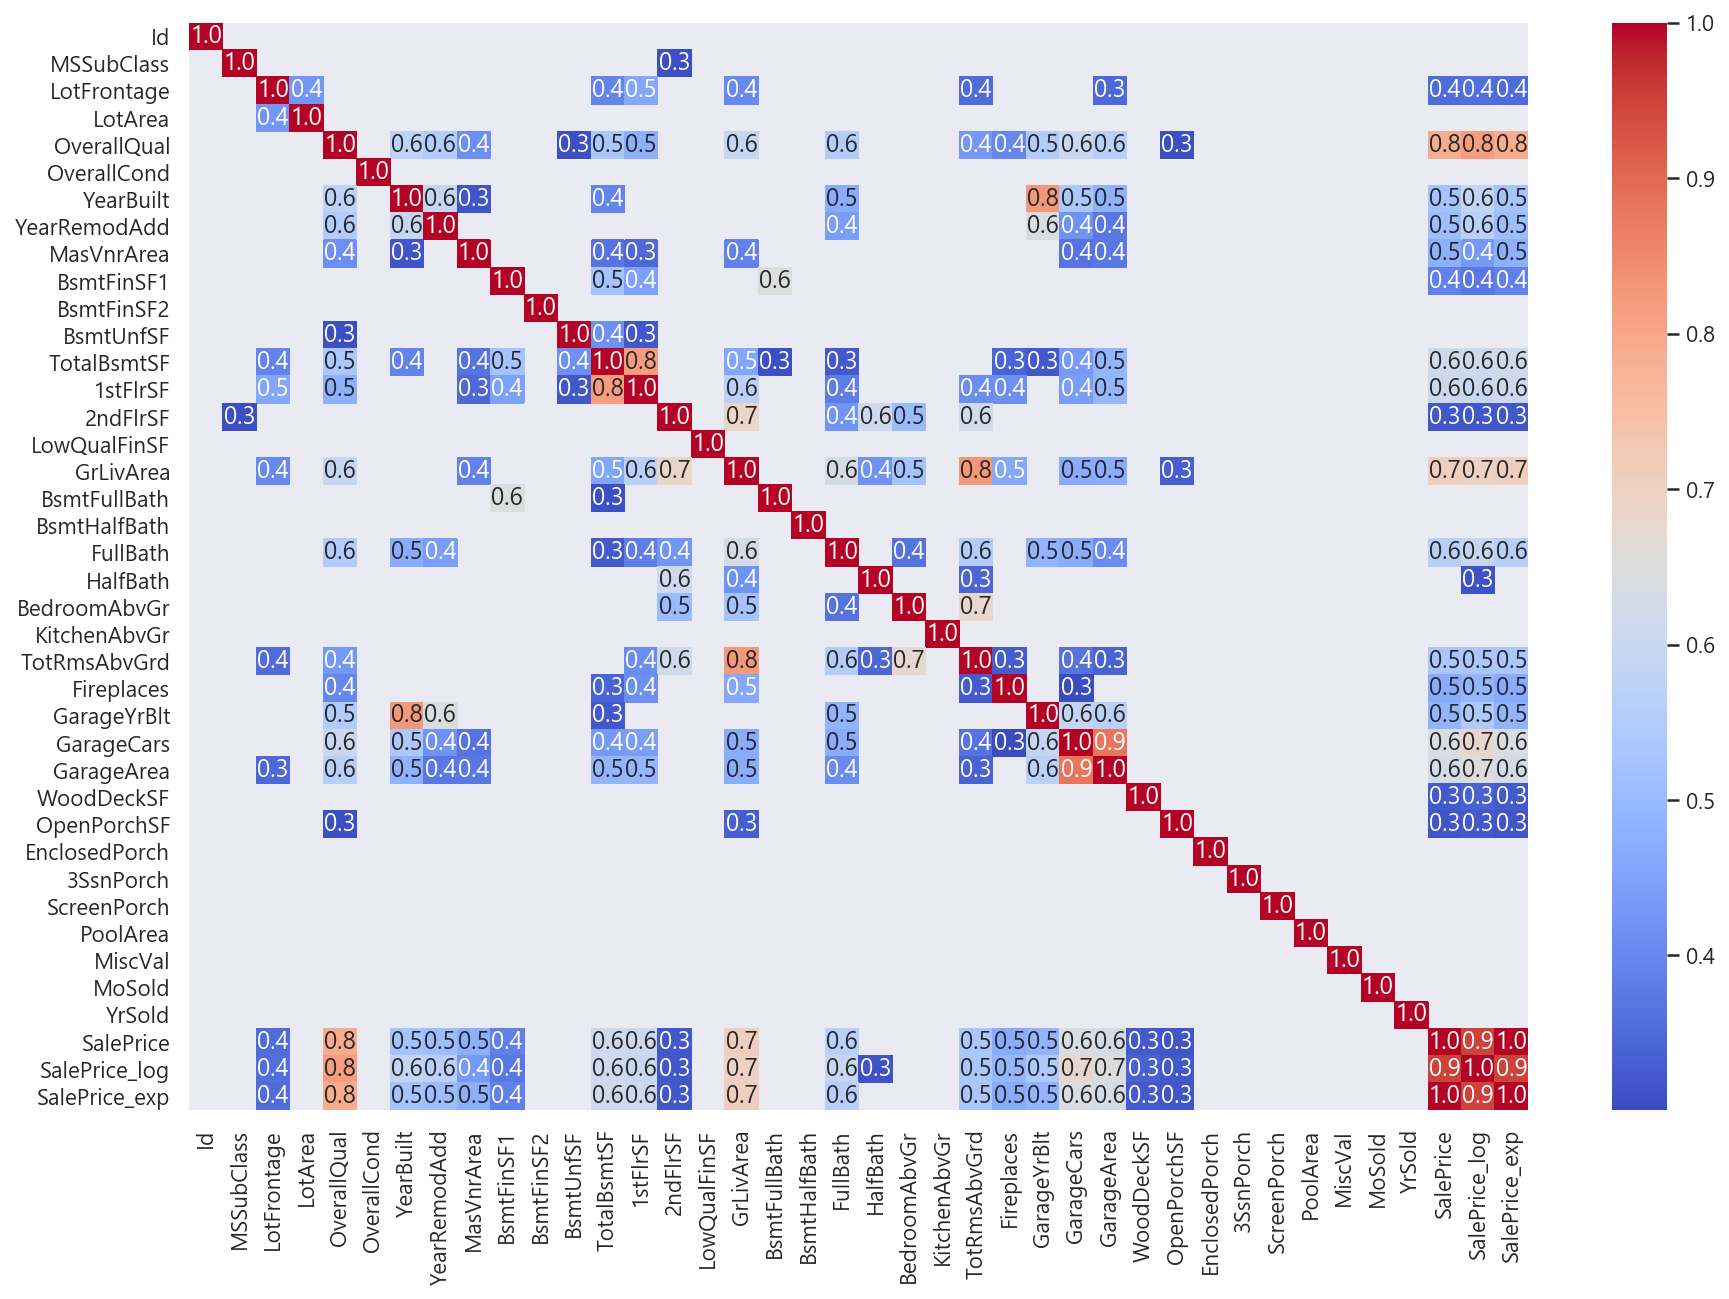

In [67]:
corr_3 = corr[corr > 0.3]
plt.figure(figsize=(15,10))
sns.heatmap(data =corr_3, annot=True, fmt='.1f', cmap='coolwarm')

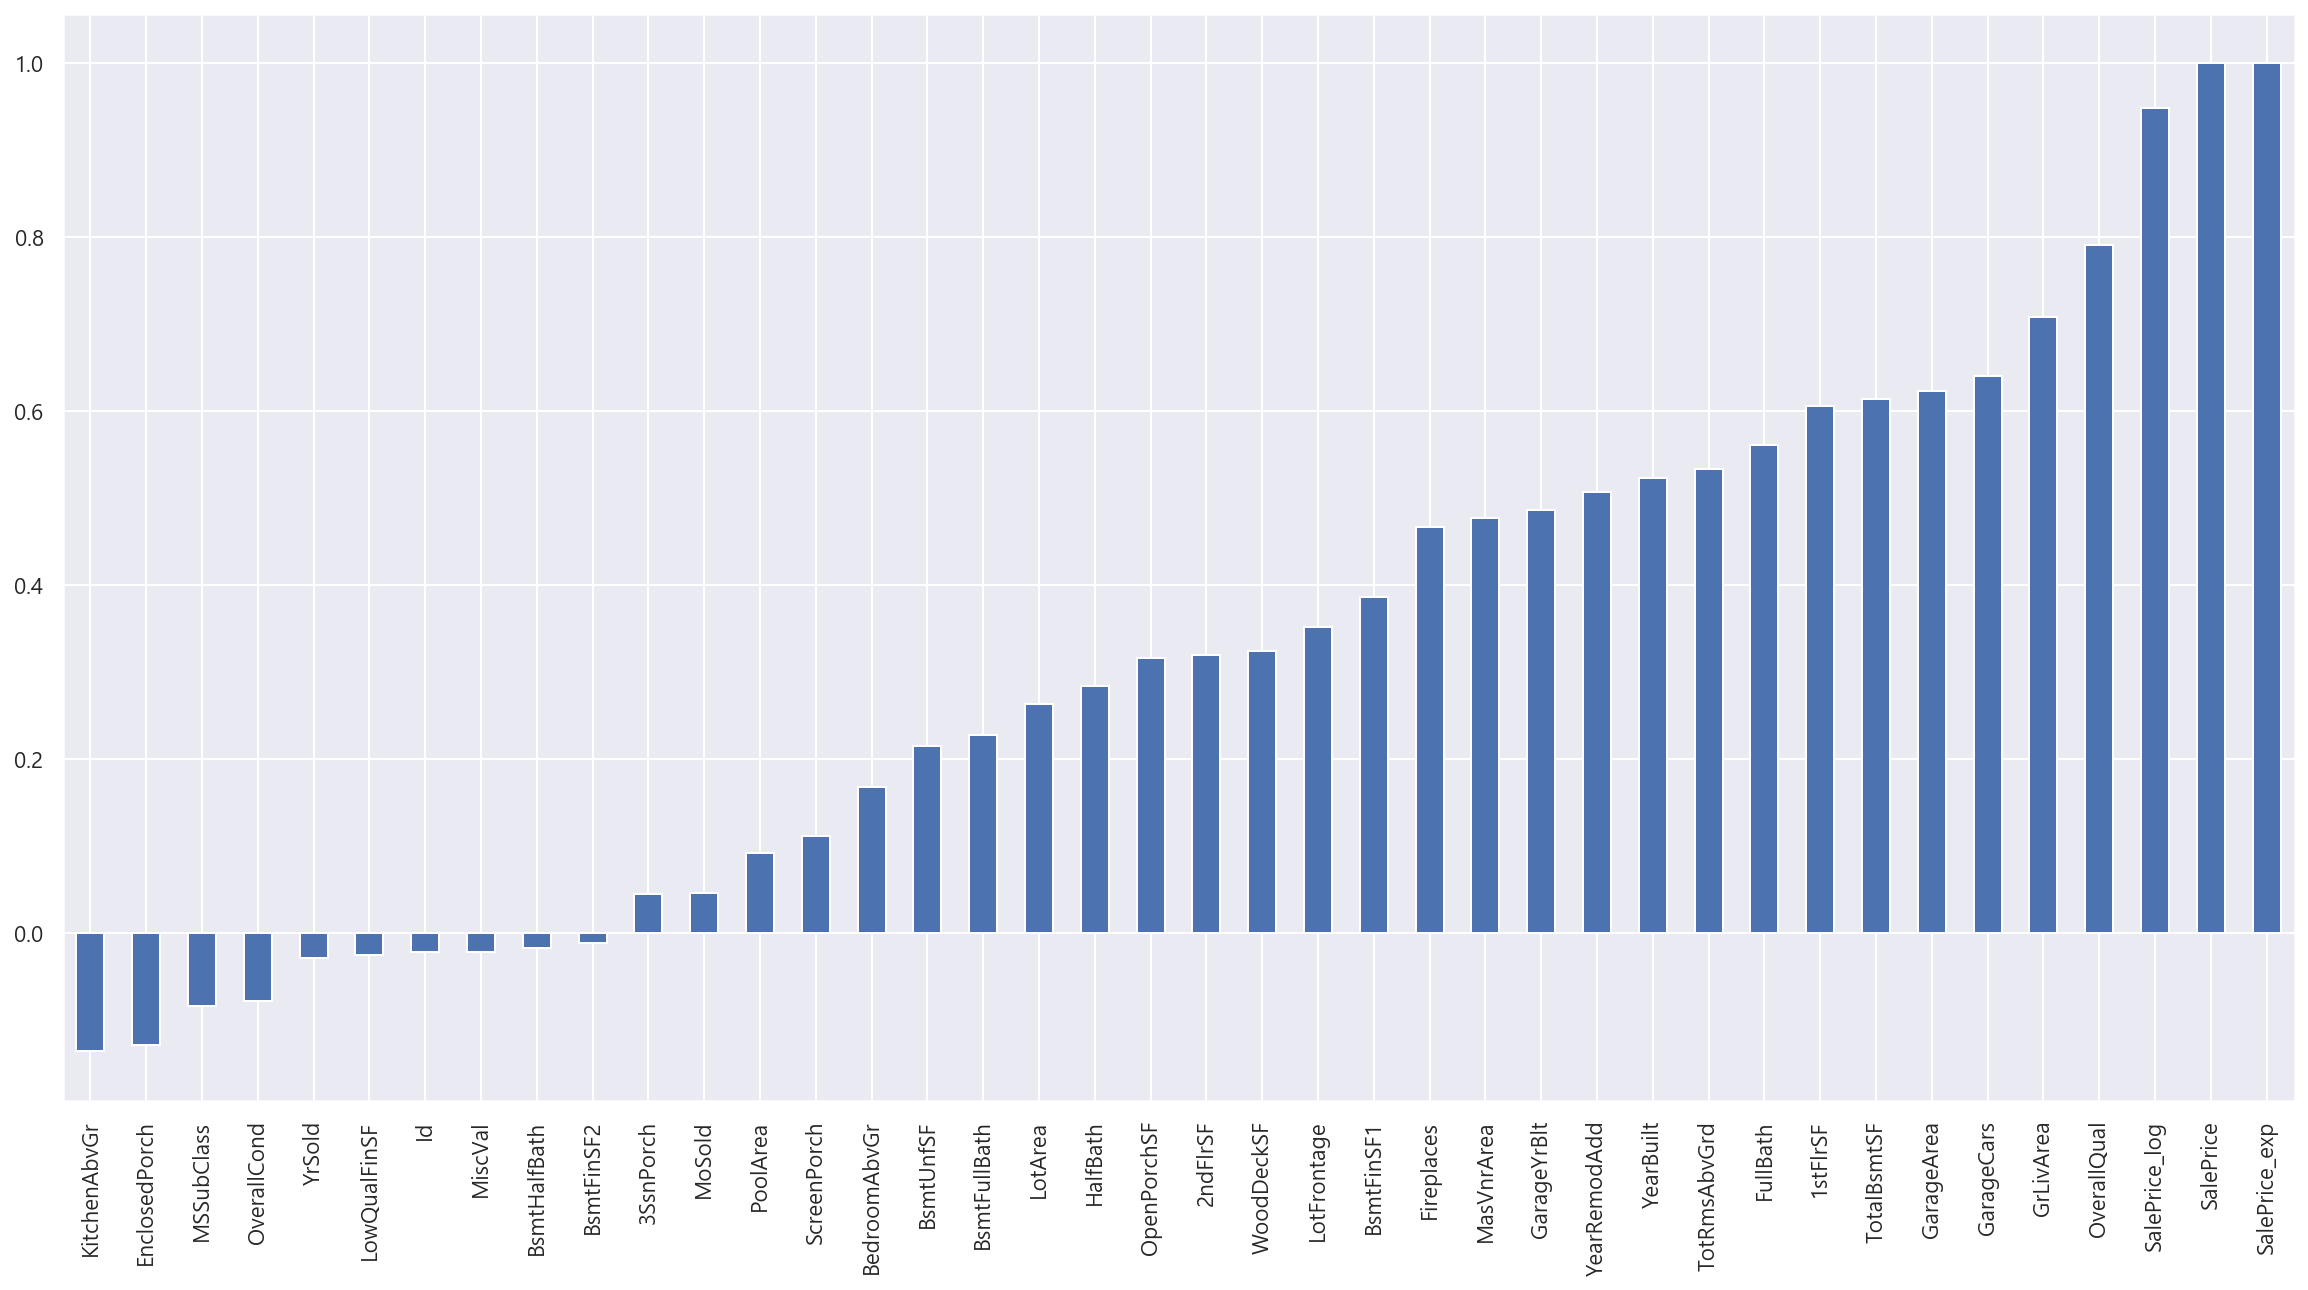

In [68]:
# SalePrice와 상관계수가 특정 수치 이상인 변수의 인덱스를 봅니다.

corr["SalePrice"].sort_values().plot.bar(figsize=(20,10))

In [69]:
# pairplot을 모든 변수에 대해 그리면 오래 걸립니다.
# 위에서 그렸던 상관계수가 높은 변수만 그려봅니다.
# 이상치, 상관계수, 왜도, 첨도 등을 한눈에 볼 수 있습니다.

sns.pairplot(train, )

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023518115318> (for post_execute):


KeyboardInterrupt: 

In [70]:
corr["SalePrice"].sort_values().tail()

GrLivArea        0.708624
OverallQual      0.790982
SalePrice_log    0.948374
SalePrice        1.000000
SalePrice_exp    1.000000
Name: SalePrice, dtype: float64

IndexError: invalid index to scalar variable.

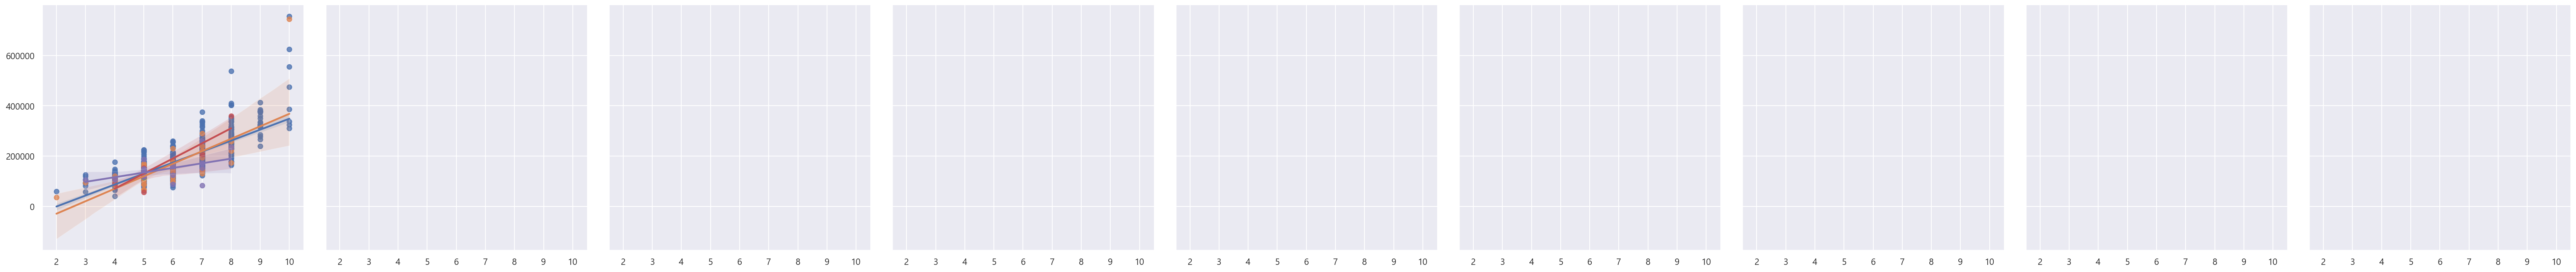

In [231]:
# lmplot으로 상관계수가 SalePrice와 가장 높은 변수의 회귀선을 그립니다.
# 이때 범주형 변수인 SaleCondition, SaleType 에 따라 색상과 컬럼을 따로 그립니다.

sns.lmplot(data=train.dropna(), x="OverallQual", y="SalePrice", hue="SaleCondition", col="SaleType")

### 왜도 Skewness

* [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)
* 확률 이론 및 통계학에서, 비대칭도(非對稱度, skewness) 또는 왜도(歪度)실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.

In [77]:
# 왜도가 특정 수치 이상인 데이터를 따로 봅니다.
# 마이너스 값이 나올 수 있기 때문에 절대값을 씌우고 봅니다.
# 왜도가 큰 값을 skewed_col 변수에 담습니다.

train_skew = abs(train.skew())
skewed_col = train_skew[train_skew > 5].index.tolist()
skewed_col

['LotArea', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']

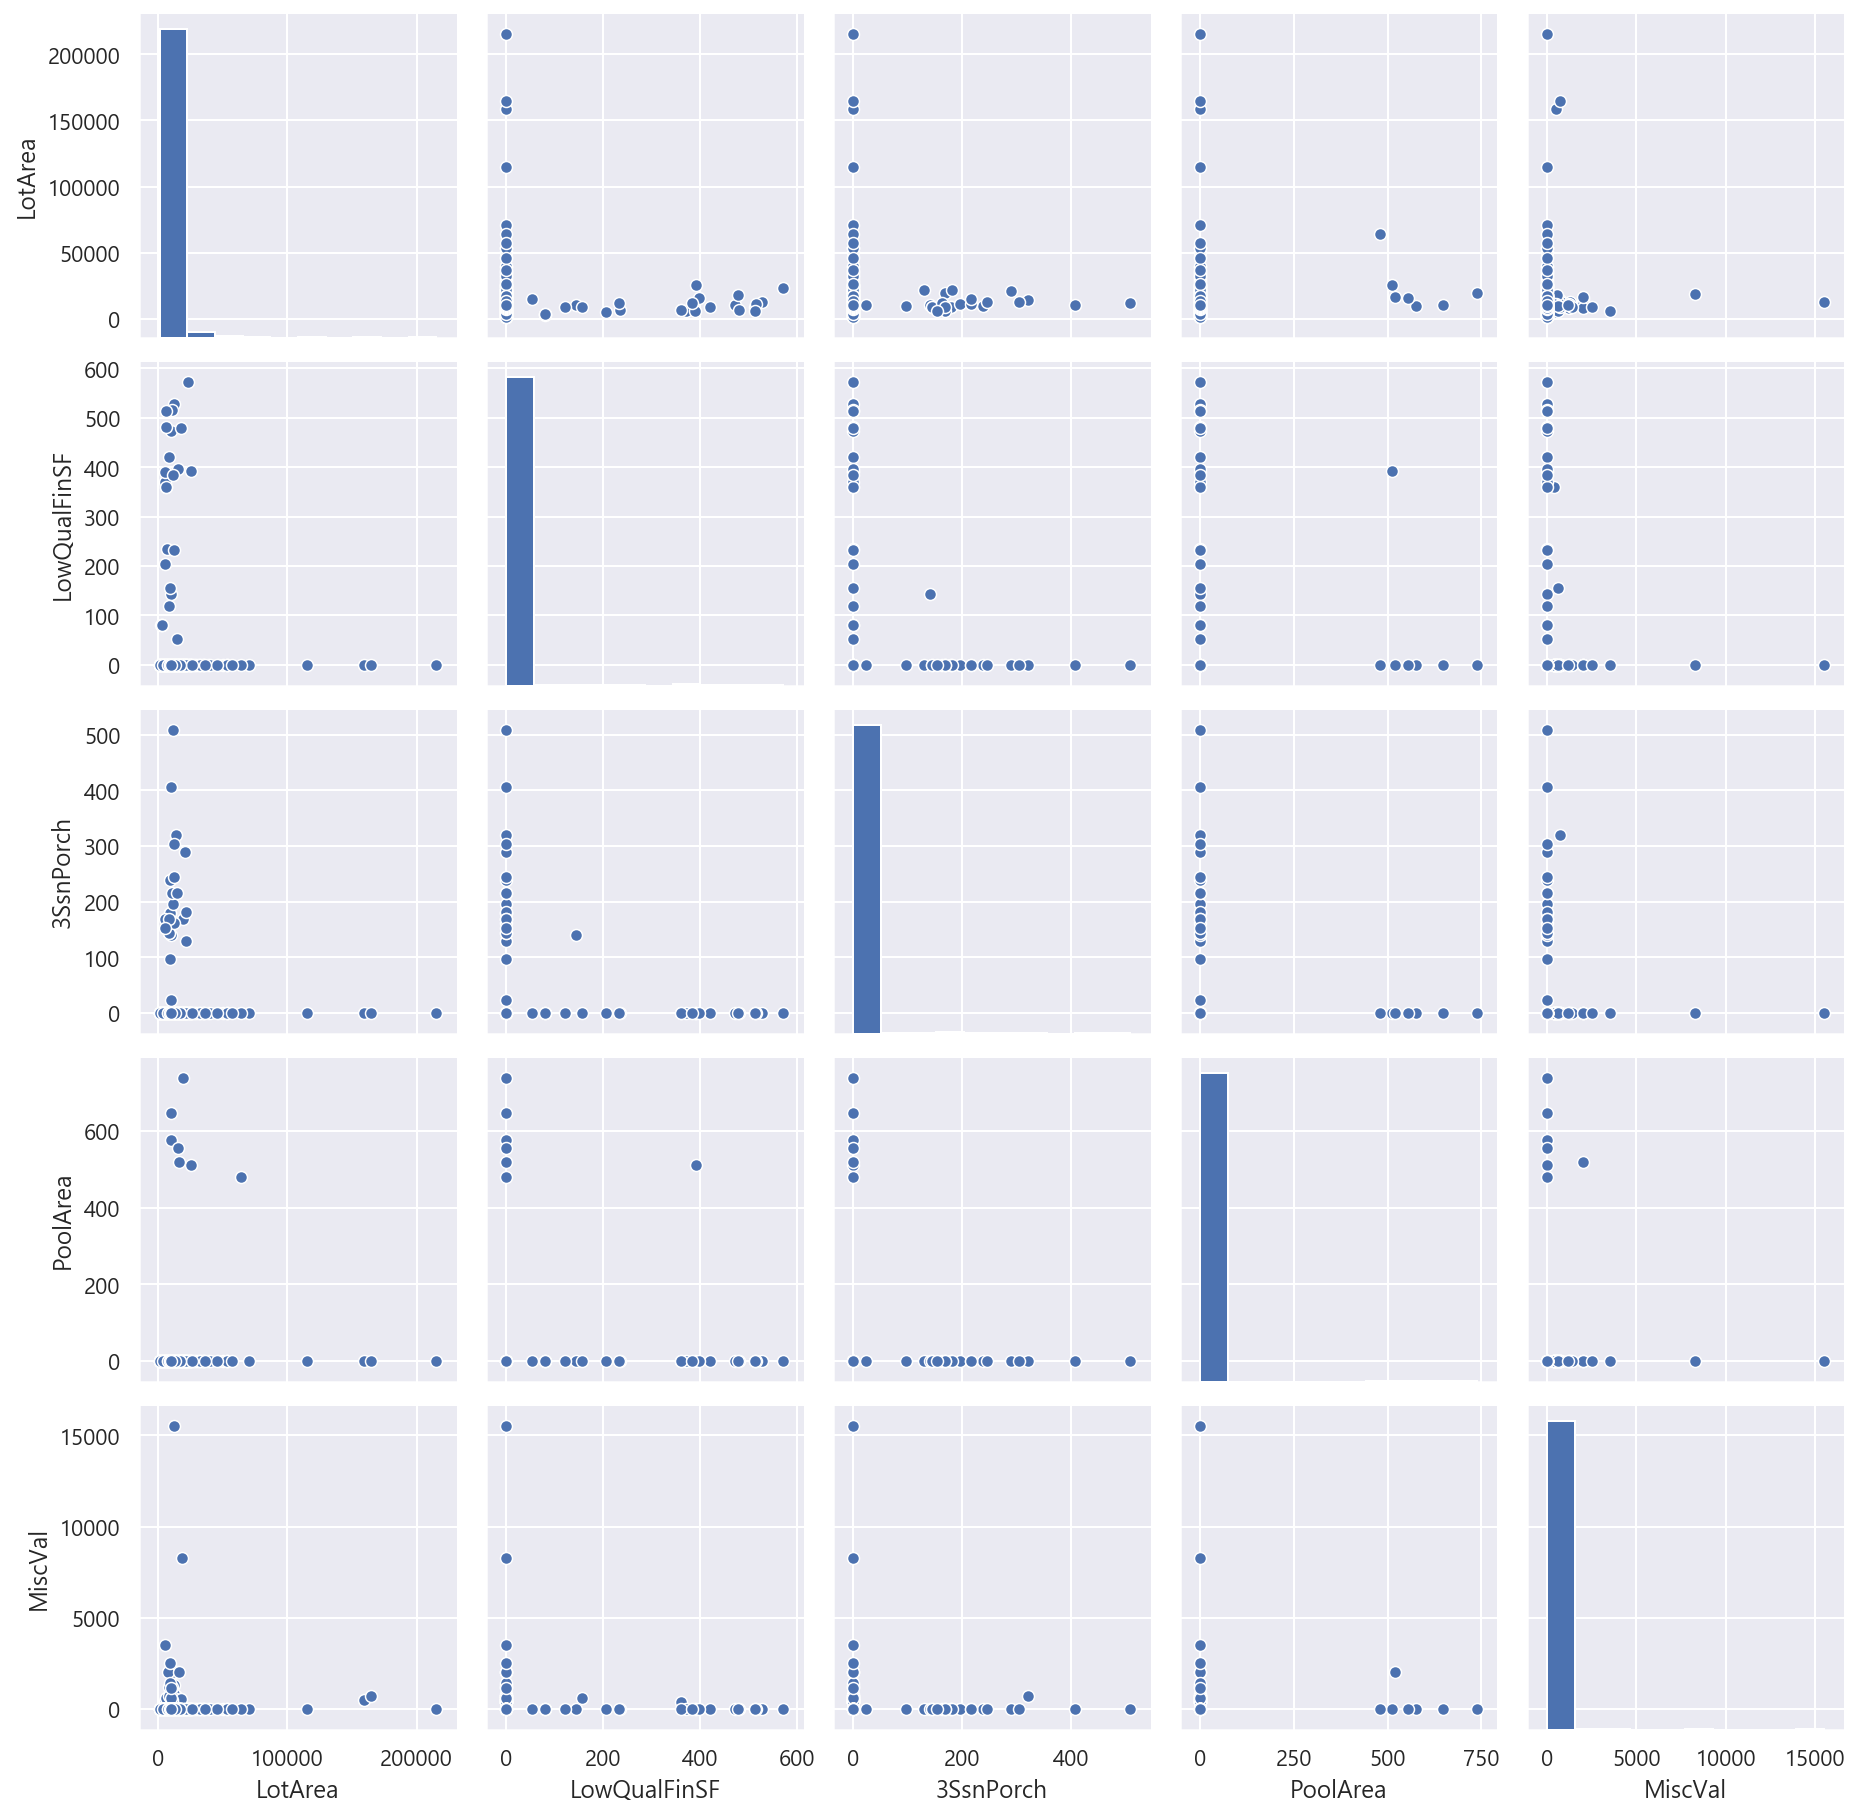

In [78]:
# 왜도가 큰 값만 따로 pairplot으로 그립니다.

sns.pairplot(train[skewed_col])

In [81]:
# 왜도를 줄여주기
# 로그변환을 통해 값의 차이가 많이 나는 것을 줄여줍니다.
# np.log(train[skewed_col] + 1)
log_col_list = []
for col in skewed_col:
    log_col = f"{col}_log"
    train[log_col] = np.log(train[col] + 1)
    log_col_list.append(log_col)

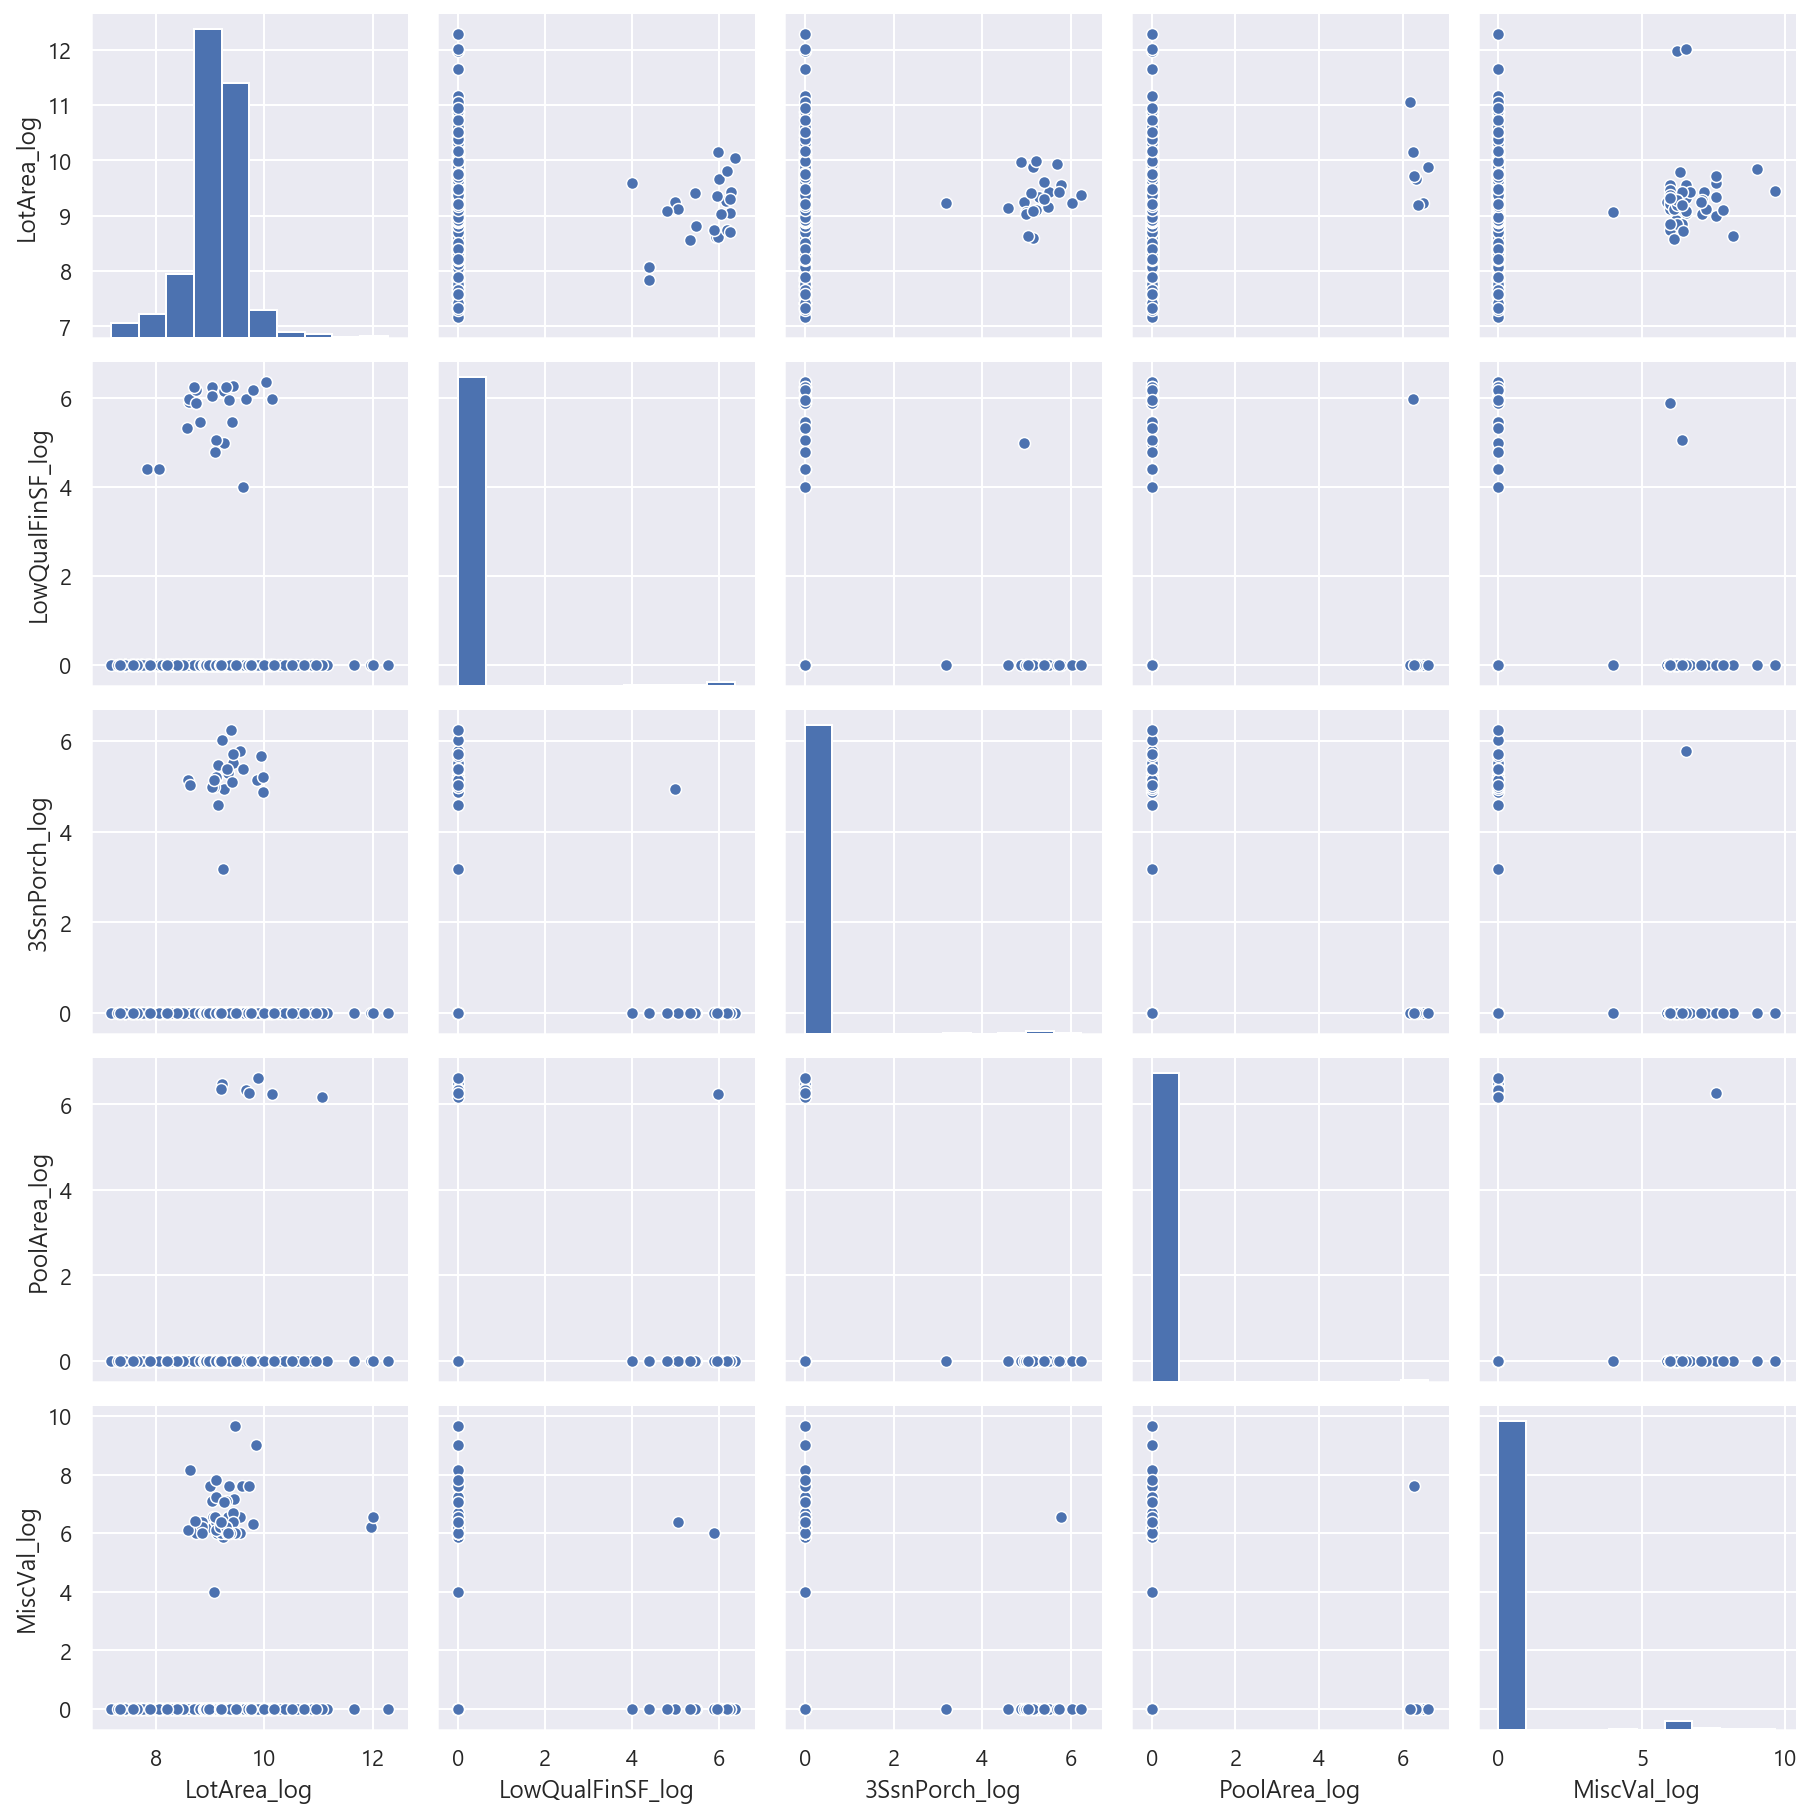

In [82]:
sns.pairplot(train[log_col_list])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002359EB8DE08>,
      dtype=object)

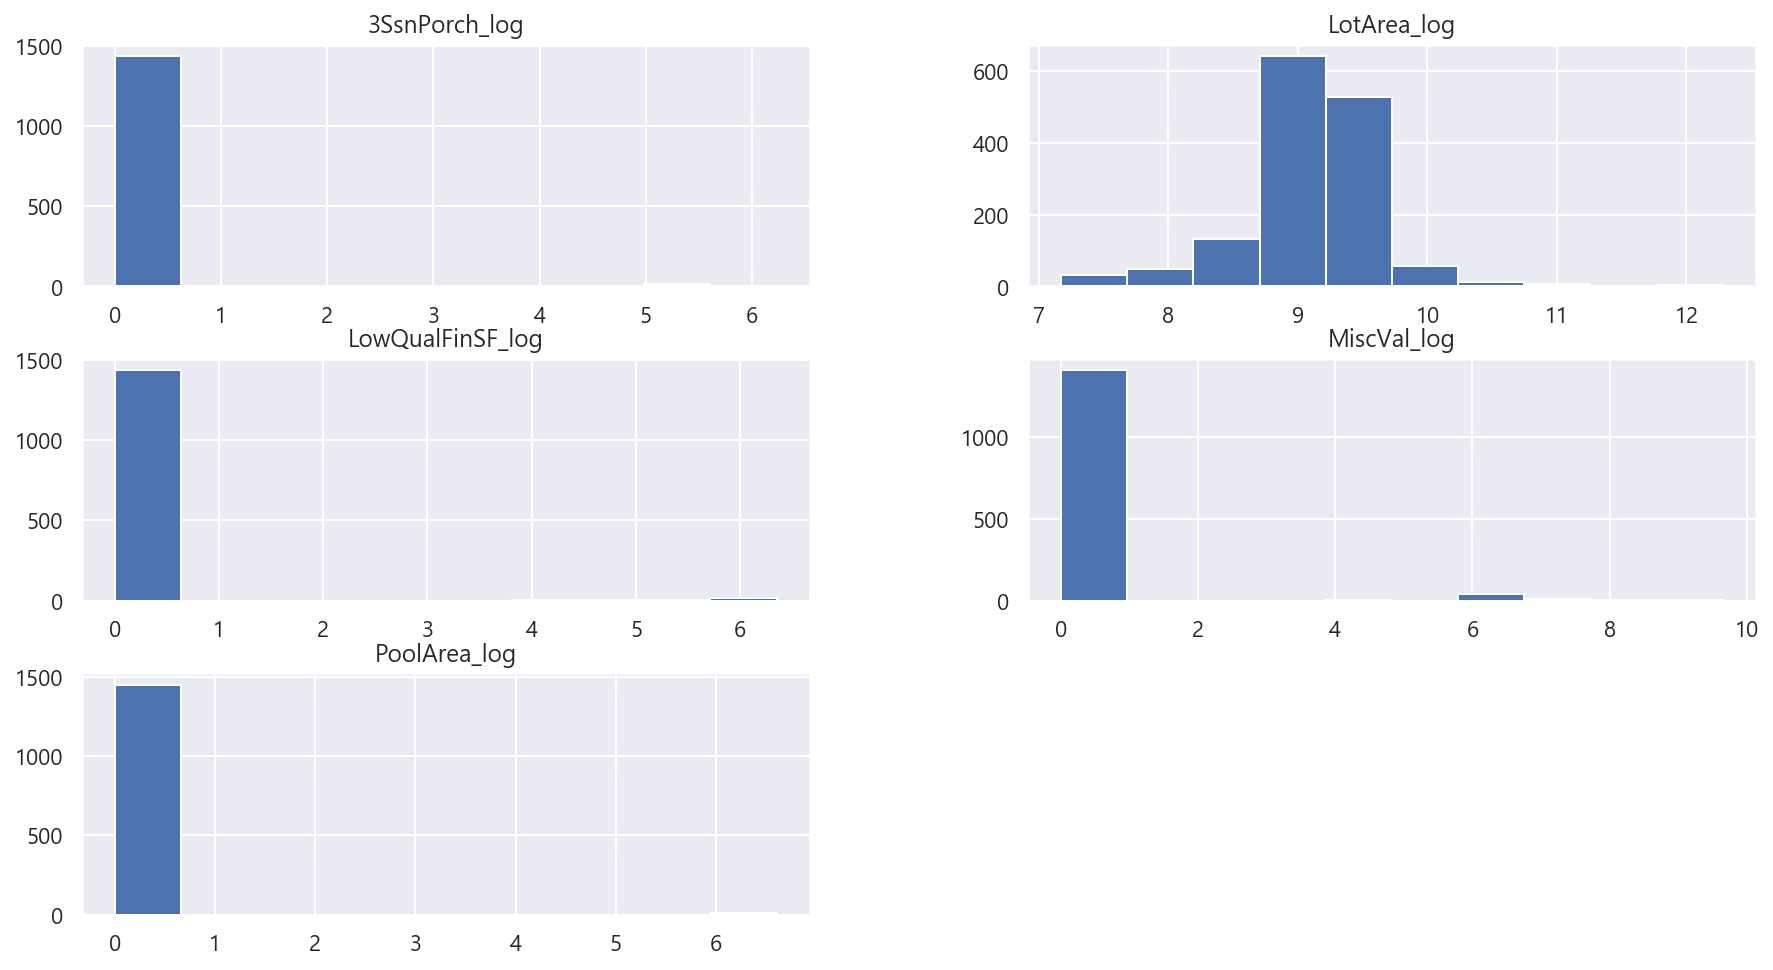

In [84]:
train[log_col_list].hist(figsize=(15,8))

### 범주형 변수 보기

In [88]:
# object 타입의 변수만 따로 봅니다. 

object_col = train.dtypes[train.dtypes =='object'].index.tolist()
object_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [90]:
# 범주형 변수의 결측치만 따로 봅니다.

train[object_col].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [92]:
# 범주형 값의 결측치를 "None" 으로 채웁니다.
train[object_col] = train[object_col].fillna("None")
train[object_col].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [97]:
# get_dummies 로 원핫인코딩을 합니다.
# train_ohe, test_ohe 이라는 새로운 변수에 담습니다.

feature_col = test.columns.tolist()
train_ohe = pd.get_dummies(train[feature_col])
test_ohe = pd.get_dummies(test[feature_col])

In [99]:
# 원핫인코딩 후 기존 데이터와 갯수를 비교합니다.

train_ohe.shape , test_ohe.shape

((1460, 304), (1459, 271))

In [100]:
test_ohe.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=271)

## Feature Engineering
### 수치형 타입만 가져오기
* 모든 컬럼을 feature 로 사용하기 전에 바로 사용할 수 있는 수치 데이터를 먼저 사용합니다.

In [ ]:
# feature_names list 만들기


In [101]:
feature_names = test_ohe.columns.tolist()
len(feature_names)

271

In [102]:
train_ohe[feature_names]

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003          2003       196.0         706           0        150   
1          1976          1976         0.0         978           0        284   
2          2001          2002       162.0         486           0        434   
3          1915          1970         0.0         216           0        540   
4          2000          2000       350.0         655           0        490   
...         ...           ...         ...         ...         ...        ...   
1455       1999          2000         0.0           0           0        953   
1456       1978          1988       119.0         790         163        589   
1457       1941          2006         0.0         275           0        877   
1458       1950          1996         0.0          49        1029          0   
1459       1965          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4

In [103]:
# label_name 변수에 예측에 사용할 정답 값 지정하기

label_name = "SalePrice"

### Feature 만들기
* 학습과 예측에 사용할 데이터셋 만들기

In [108]:
# X_train 만들기 - 학습에 사용할 데이터셋 예) 기출문제

X_train = train_ohe[feature_names]
X_train.shape

(1460, 271)

In [109]:
# y_train 만들기 - 학습에 사용할 정답값 예) 기출문제의 정답

y_train = train[label_name]
y_train.shape

(1460,)

In [111]:
# X_test - 예측에 사용할 데이터셋 예) 실전 시험문제

X_test = test_ohe[feature_names]
X_test.shape

(1459, 271)

### 수치형 변수 결측치 채우기
* 임의의 값으로 채우기
* 평균, 중앙값으로 채우기
* 제거하기
* 머신러닝 기법으로 채우기
* [Imputing missing values before building an estimator — scikit-learn 0.22.2 documentation](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py)

In [113]:
# X_train의 결측치를 fillna 로 채우기

X_train = X_train.fillna(0)

In [114]:
# X_test의 결측치를 fillna 로 채우기

X_test = X_test.fillna(0)

### log 변환하기

In [151]:
y_train = np.log(train[label_name] + 1)

In [152]:
y_train

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

## 머신러닝으로 예측하기

In [153]:
# 머신러닝 모델을 불러옵니다.

# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor(random_state=42)
# model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [171]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=42)
# model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [191]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)
model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [226]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42), RandomForestRegressor(random_state=42), GradientBoostingRegressor(random_state=42)]

In [213]:
np.random.randint(5, 30)

16

In [214]:
np.random.uniform(0.3, 1.0, 10)

array([0.53495188, 0.62225717, 0.82902008, 0.37992729, 0.70268917,
       0.34484954, 0.45755243, 0.71392743, 0.8881927 , 0.30917109])

In [227]:
for estimator in estimators:
    print(estimators.__class__.__name__)

list
list
list


In [233]:
from sklearn.model_selection import RandomizedSearchCV

rs_result_list = []  # 모든 결과 목록
for estimator in estimators:
    
    re_result = [] # 해당 for 문의 결과
    param_distributions = {
        "max_depth" : np.random.randint(5, 30, 10),
        "max_features" : np.random.uniform(0.3, 1.0, 10)
    }
    
    regressor = RandomizedSearchCV(
        estimator,
        param_distributions,
        n_iter=10,
        scoring=None,
        n_jobs=-1,
        refit=True,
        cv=None,
        verbose=0,
        random_state=42)
    regressor.fit(X_train, y_train)
    
    re_result.append(estimator.__class__.__name__)
    re_result.append(regressor.best_estimator_)
    re_result.append(regressor.best_params_)
    re_result.append(regressor.best_score_)
    re_result.append(regressor.cv_results_)
    rs_result_list.append(re_result)
    

In [255]:
df_result

estimator  \
0      DecisionTreeRegressor   
1      RandomForestRegressor   
2  GradientBoostingRegressor   

                                     best_estimator_  \
0  DecisionTreeRegressor(ccp_alpha=0.0, criterion...   
1  (DecisionTreeRegressor(ccp_alpha=0.0, criterio...   
2  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...   

                                        best_params_  best_score_  \
0  {'max_features': 0.8680710993586769, 'max_dept...     0.752530   
1  {'max_features': 0.44268095763091336, 'max_dep...     0.879164   
2  {'max_features': 0.6280509125944341, 'max_dept...     0.897025   

                                         cv_results_  
0  {'mean_fit_time': [0.05202631950378418, 0.0647...  
1  {'mean_fit_time': [1.24459810256958, 1.1377360...  
2  {'mean_fit_time': [1.3245741367340087, 1.38532...

In [223]:
df_result = pd.DataFrame(rs_result_list, columns = ["estimator", "best_estimator_", "best_params_", "best_score_", "cv_results_"])
df_best = df_result.sort_values("best_score_", ascending=False).head(1)
df_best

estimator  \
2  GradientBoostingRegressor   

                                     best_estimator_  \
2  ([DecisionTreeRegressor(ccp_alpha=0.0, criteri...   

                                        best_params_  best_score_  \
2  {'max_features': 0.6280509125944341, 'max_dept...     0.897025   

                                         cv_results_  
2  {'mean_fit_time': [1.3245741367340087, 1.38532...

In [235]:
model = df_best.iloc[0]["best_estimator_"]
model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=0.6280509125944341, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### KFold 로 Cross Validation 하기

In [236]:
# KFold 를 사용해서 분할을 나눕니다.

from sklearn.model_selection import KFold
KFold(5)

KFold(n_splits=5, random_state=None, shuffle=False)

### cross_val_score 와 cross_val_predict 로 점수 구하기

In [237]:
# cross_val_score 로 점수를 계산합니다.
# scoring='neg_root_mean_squared_error'
# cv_results 에 결과값을 담고 평균을 구합니다.


from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8959321467952497

In [238]:
# cross_val_predict 로 예측 결과를 구합니다.
# y_cv_pred 에 결과를 담습니다.

from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1)

### RMSE

In [239]:
# 직접 RMSE로 오차를 구합니다.
# 실제값에서 예측값 뺸거 에러
error = (y_train - y_pred)
mse = (error **2).mean()
rmse = np.sqrt(mse)
rmse

0.12815504265760397

### 실제값과 예측값 비교하기

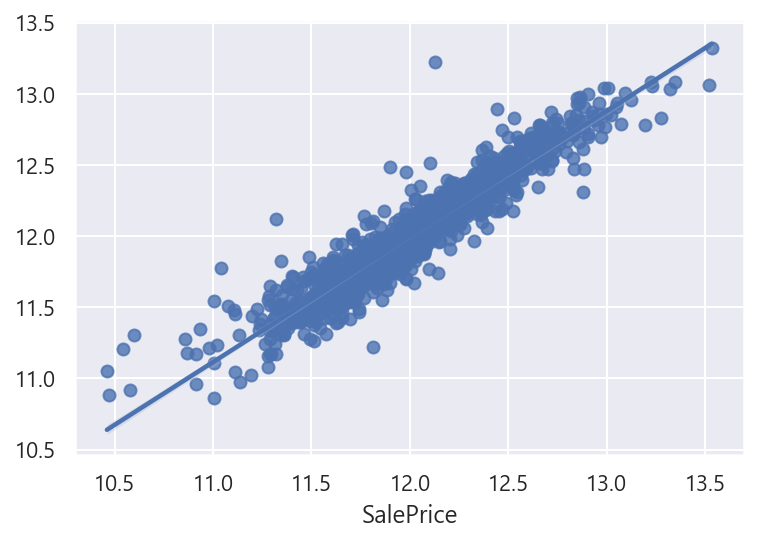

In [240]:
# regplot 으로 예측값에 대한 회귀선 그리기
sns.regplot(x=y_train, y=y_pred)

In [241]:
# r2스코어로 회귀선의 기울기 구하기

from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.896997991805833

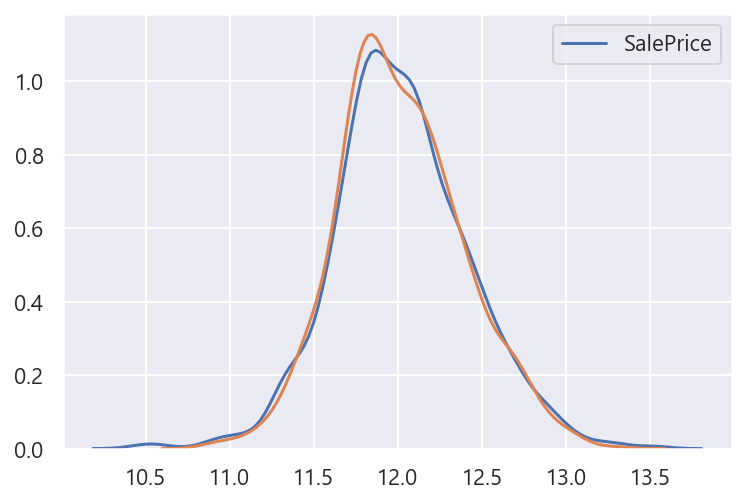

In [242]:
# distplot의 kdeplot으로 실제값과 예측값 비교하기

sns.kdeplot(y_train)
sns.kdeplot(y_pred)

## 학습(훈련)과 예측

In [243]:
# 학습하고 예측하기
# 모의고사를 풀어보고 바로 실전을 풀어봅니다.

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=0.6280509125944341, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### 피처 중요도 보기

In [244]:
# 피처 중요도 보기
df_importance = pd.DataFrame({"importance" : model.feature_importances_, "feature_names" : feature_names})
df_importance_top = df_importance.sort_values("importance", ascending=False).head(10)

In [245]:
y_test_pred = model.predict(X_test)

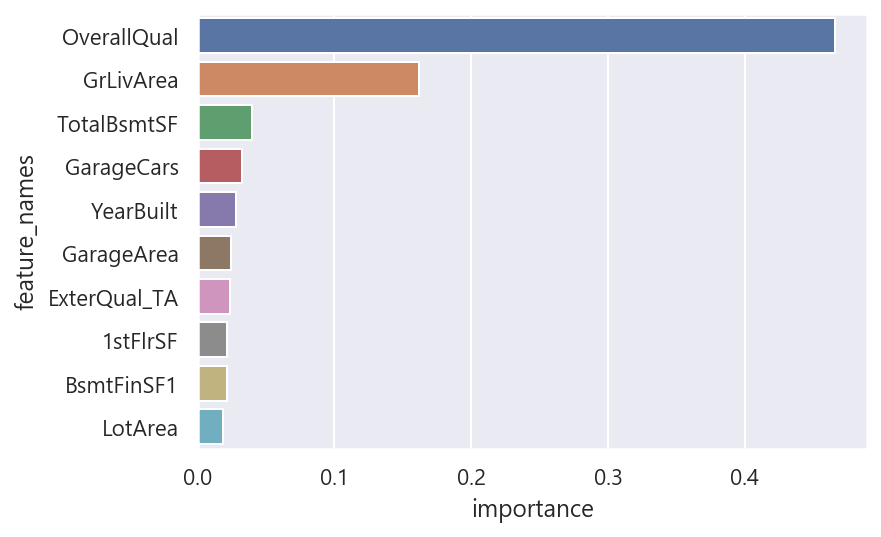

In [246]:
# 시각화 하기
sns.barplot(data= df_importance_top, x="importance", y="feature_names")

## Submit

In [247]:
# 제출 파일 양식을 불러옵니다.

submit = pd.read_csv("data/sample_submission.csv")
submit.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [248]:
# 정답을 옮겨 적습니다.

submit["SalePrice"] = np.exp(y_test_pred) -1
submit.head()

Id      SalePrice
0  1461  119546.120764
1  1462  156727.987762
2  1463  188298.317304
3  1464  187751.153386
4  1465  184074.030550

In [249]:
# csv 파일로 저장합니다.
submit.to_csv('data/submit.csv', index=False)

In [250]:
# 제대로 저장되었는지 확인합니다.

pd.read_csv('data/submit.csv')

Id      SalePrice
0     1461  119546.120764
1     1462  156727.987762
2     1463  188298.317304
3     1464  187751.153386
4     1465  184074.030550
...    ...            ...
1454  2915   76353.160787
1455  2916   80147.588569
1456  2917  146281.891880
1457  2918  105732.438964
1458  2919  228131.741214

[1459 rows x 2 columns]

In [251]:
3878 / 4666

0.831118731247321

In [252]:
2689 /4666

0.5762966138019717